In [119]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import WordCloud
import seaborn as sns
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud

In [121]:
casos_legales = pd.read_excel("C:/Users/DIANA VALLE/OneDrive/Documentos/prueba_tecnica/Prueba tecnica 2/Datos/sentencias_pasadas.xlsx")
print(casos_legales.head())  
print(casos_legales.columns)

   #  Relevancia Providencia  Tipo Fecha Sentencia  \
0  1    966965.0    T-185/22   NaN      2022-05-31   
1  3    963168.0    T-356/21   NaN      2021-10-15   
2  5    956201.0    T-351/22   NaN      2022-10-07   
3  6    955889.0    T-246/21   NaN      2021-07-29   
4  7    955787.0   T-245A/22   NaN      2022-07-01   

                                      Tema - subtema  \
0                                                NaN   
1  ACCIÓN DE TUTELA PARA PROTEGER EL DERECHO A LA...   
2  ACCIÓN DE TUTELA PARA PROTEGER EL DERECHO A LA...   
3  ACCION DE TUTELA PARA PROTEGER EL DERECHO A LA...   
4  ACCION DE TUTELA-Inexistencia de hecho superad...   

                                            resuelve  \
0  en nombre del pueblo y por mandato de la Const...   
1  en nombre del pueblo y por mandato de la Const...   
2  administrando justicia en nombre del Pueblo, y...   
3  en nombre del pueblo y por mandato de la Const...   
4  en nombre del pueblo y por mandato de la Const...   

 

In [123]:
#Renombrar columnas de forma que sean manejables
casos_legales.columns.values[0] = "numero"
casos_legales.columns.values[1] = "relevancia"
casos_legales.columns.values[2] = "providencia"
casos_legales.columns.values[3] = "tipo"
casos_legales.columns.values[4] = "fecha_sentencia"
casos_legales.columns.values[5] = "tema_subtema"
casos_legales.columns = casos_legales.columns.str.strip()
print(casos_legales.columns)

Index(['numero', 'relevancia', 'providencia', 'tipo', 'fecha_sentencia',
       'tema_subtema', 'resuelve', 'sintesis'],
      dtype='object')


In [125]:
#Convertir la columna a tipo de dato fecha
casos_legales["fecha_sentencia"] = pd.to_datetime(casos_legales["fecha_sentencia"], format="%d/%m/%Y", errors="coerce")
#Limpiar columas con texto
casos_legales["resuelve"] = casos_legales["resuelve"].astype(str).str.strip()
casos_legales["sintesis"] = casos_legales["sintesis"].astype(str).str.strip()

In [127]:
casos_legales.duplicated(subset=["numero", "providencia"]).sum()

np.int64(0)

In [129]:
#Manejar los valores nulos 
casos_legales["tema_subtema"] = casos_legales["tema_subtema"].fillna("DESCONOCIDO")

In [131]:
casos_legales["texto_completo"] = casos_legales["sintesis"] + "\n\n" + casos_legales["resuelve"]

In [133]:
#Agrupar por año y mes y contar el numero de sentencias
casos_legales['anio'] = casos_legales['fecha_sentencia'].dt.year
casos_legales['mes'] = casos_legales['fecha_sentencia'].dt.month
sentencias_anio = casos_legales['anio'].value_counts().sort_index()
sentencias_mes = casos_legales.groupby(['anio', 'mes']).size().unstack()

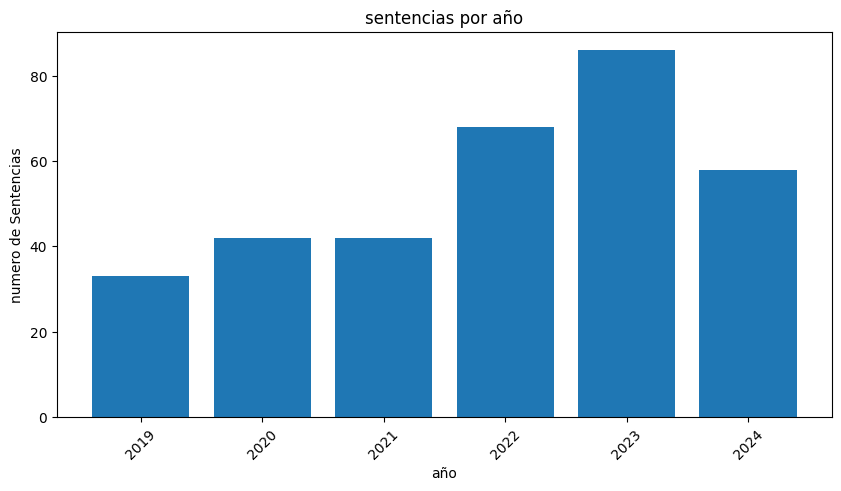

In [135]:
#Graficar la distribucion de sentencias 
plt.figure(figsize=(10, 5))
plt.bar(sentencias_anio.index, sentencias_anio.values)
plt.xlabel("año")
plt.ylabel("numero de Sentencias")
plt.title("sentencias por año")
plt.xticks(rotation=45)
plt.show()

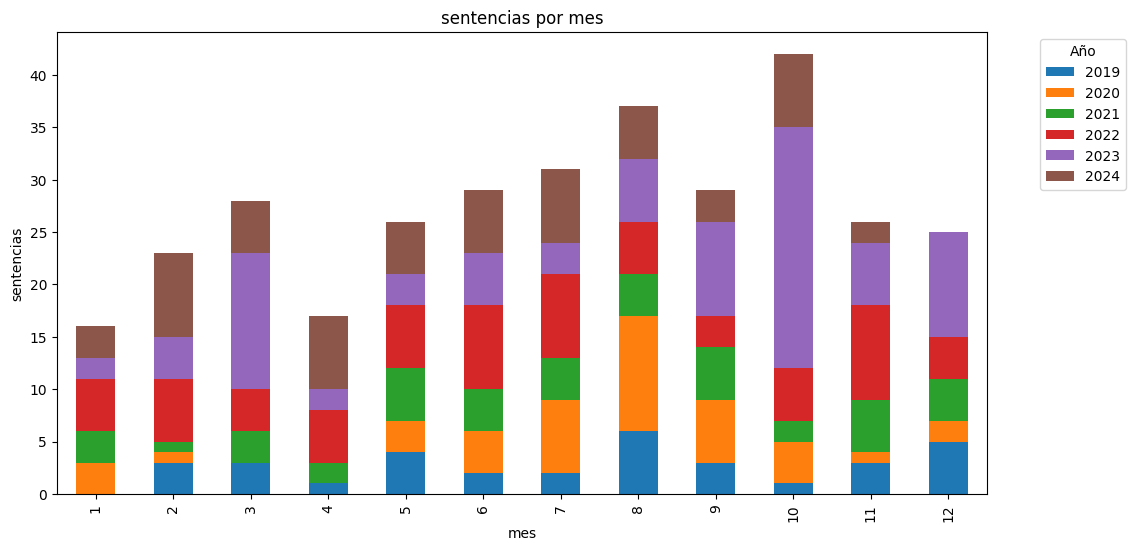

In [137]:
#Grafica de sentencias
sentencias_mes.T.plot(kind='bar', figsize=(12, 6), stacked=True)
plt.xlabel("mes")
plt.ylabel("sentencias")
plt.title("sentencias por mes")
plt.legend(title="Año", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [139]:
casos_legales['tema_subcorto'] = casos_legales['tema_subtema'].str.split().str[:5].str.join(' ')
temas_contador = Counter(casos_legales['tema_subcorto'].dropna().str.lower())
temas_comunes = temas_contador.most_common(10)
temas = pd.DataFrame(temas_comunes, columns=['tema', 'frecuencia'])

C:\Users\DIANA VALLE\AppData\Local\Temp\ipykernel_9076\3795751729.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=temas, y='tema', x='frecuencia', palette='Blues_r')


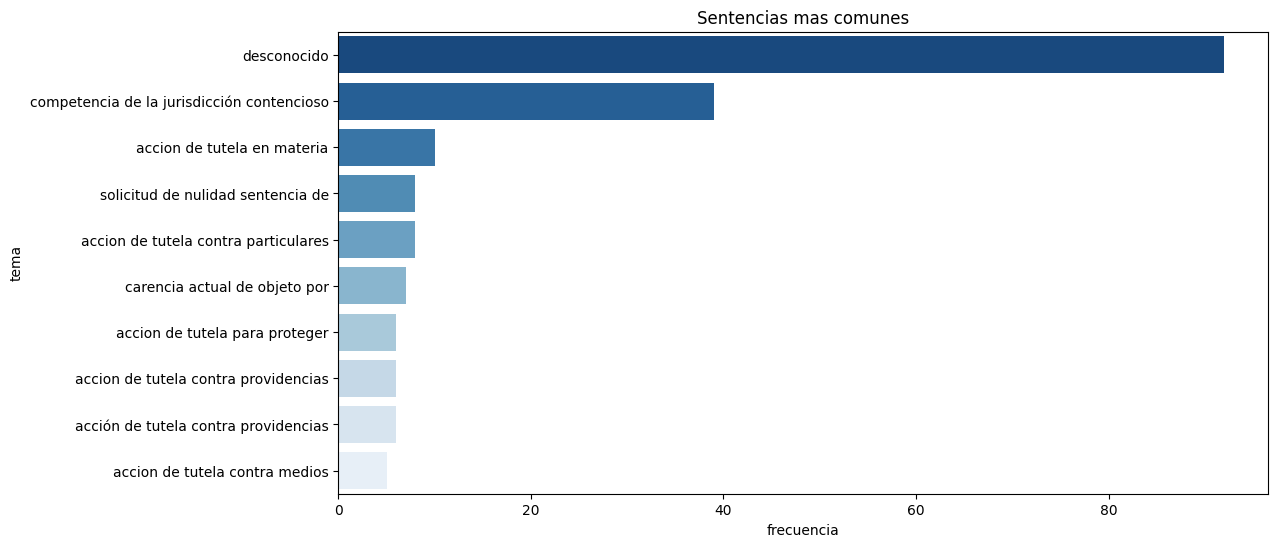

In [141]:
plt.figure(figsize=(12, 6))
sns.barplot(data=temas, y='tema', x='frecuencia', palette='Blues_r')
plt.xlabel("frecuencia")
plt.ylabel("tema")
plt.title("Sentencias mas comunes")
plt.show()

In [171]:
#lista de stop words
stop_words_legales = set([
    "de", "la", "el", "en", "y", "a", "los", "del", "se", "las", "por", "un", "para", "con",
    "no", "una", "su", "al", "es", "lo", "como", "más", "pero", "sus", "le", "ya", "este",
    "sí", "porque", "esta", "entre", "cuando", "muy", "sin", "sobre", "también", "hasta",
    "hay", "donde", "quien", "desde", "todo", "nos", "durante", "todos", "acción", "que", "o", "Así"
])

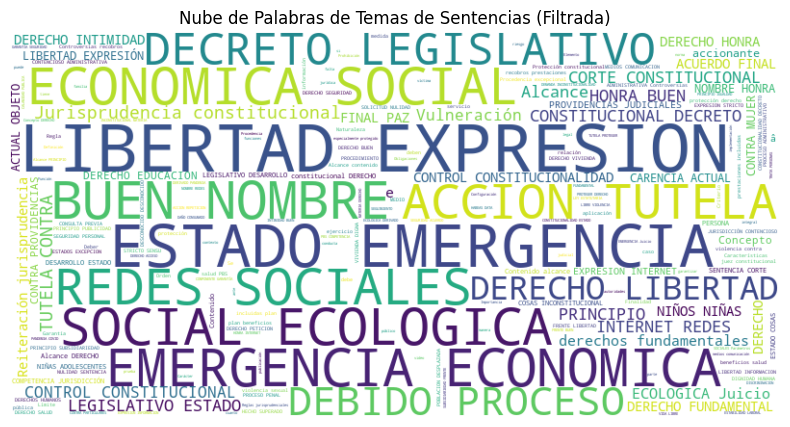

In [159]:
#unir todos los temas en un solo string
palabras_temasub = " ".join(casos_legales['tema_subtema'].dropna().astype(str))

#Reomver las stop words
palabras_filtradas = " ".join([word for word in palabras_temasub.split() if word.lower() not in stop_words_legales])

#generar la nube de palabras
nube_palabras = WordCloud(width=800, height=400, background_color='white').generate(palabras_filtradas)

#nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(nube_palabras, interpolation='bilinear')
plt.axis("off")
plt.title("Nube de Palabras de Temas de Sentencias")
plt.show()

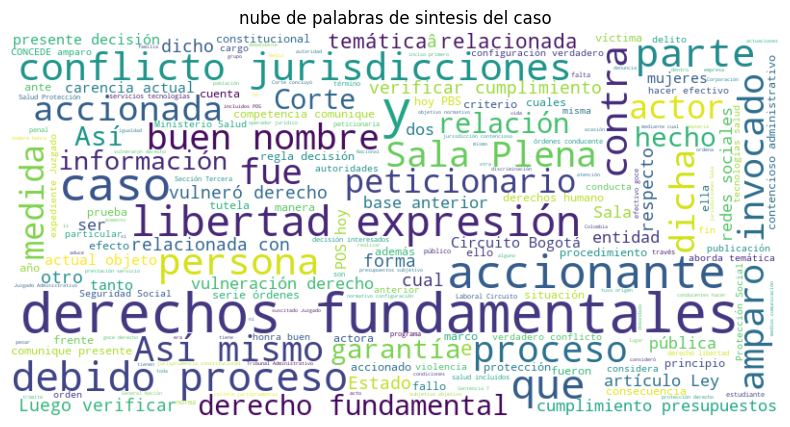

In [173]:
palabras_sintesis = " ".join(casos_legales['sintesis'].dropna().astype(str))

palabras_filtradas = " ".join([word for word in palabras_sintesis.split() if word.lower() not in stop_words_legales])

nube_palabras = WordCloud(width=800, height=400, background_color='white').generate(palabras_filtradas)

plt.figure(figsize=(10, 5))
plt.imshow(nube_palabras, interpolation='bilinear')
plt.axis("off")
plt.title("nube de palabras de sintesis del caso")
plt.show()


In [175]:
casos_legales

,numero,relevancia,providencia,tipo,fecha_sentencia,tema_subtema,resuelve,sintesis,texto_completo,anio,mes,tema_subcorto
0,1,966965.0,T-185/22,NaN,2022-05-31,DESCONOCIDO,en nombre del pueblo y por mandato de la Const...,En este caso se formula la acción de tutela en...,En este caso se formula la acción de tutela en...,2022,5,DESCONOCIDO
1,3,963168.0,T-356/21,NaN,2021-10-15,ACCIÓN DE TUTELA PARA PROTEGER EL DERECHO A LA...,en nombre del pueblo y por mandato de la Const...,El peticionario considera que los accionantes ...,El peticionario considera que los accionantes ...,2021,10,ACCIÓN DE TUTELA PARA PROTEGER
2,5,956201.0,T-351/22,NaN,2022-10-07,ACCIÓN DE TUTELA PARA PROTEGER EL DERECHO A LA...,"administrando justicia en nombre del Pueblo, y...",El periodista accionante acusa al abogado acci...,El periodista accionante acusa al abogado acci...,2022,10,ACCIÓN DE TUTELA PARA PROTEGER
3,6,955889.0,T-246/21,NaN,2021-07-29,ACCION DE TUTELA PARA PROTEGER EL DERECHO A LA...,en nombre del pueblo y por mandato de la Const...,Se presenta la acción de tutela en contra de u...,Se presenta la acción de tutela en contra de u...,2021,7,ACCION DE TUTELA PARA PROTEGER
4,7,955787.0,T-245A/22,NaN,2022-07-01,ACCION DE TUTELA-Inexistencia de hecho superad...,en nombre del pueblo y por mandato de la Const...,"El accionante, actuando en representación de s...","El accionante, actuando en representación de s...",2022,7,ACCION DE TUTELA-Inexistencia de hecho
...,...,...,...,...,...,...,...,...,...,...,...,...
324,487,106681.0,SU.016/21,NaN,2021-01-21,ABUSO DEL DERECHO-Elementos que lo configuran ...,en nombre del pueblo y por mandato de la Const...,"En este caso, el accionante y 56 personas más,...","En este caso, el accionante y 56 personas más,...",2021,1,ABUSO DEL DERECHO-Elementos que lo
325,489,100241.0,SU.257/21,NaN,2021-08-05,ACCION DE TUTELA CONTRA PROVIDENCIAS JUDICIALE...,en nombre del pueblo y por mandato de la Const...,La acción de tutela se interpuso en contra de ...,La acción de tutela se interpuso en contra de ...,2021,8,ACCION DE TUTELA CONTRA PROVIDENCIAS
326,491,99781.0,C-489/23,NaN,2023-11-16,DESCONOCIDO,RESUELVE ÚNICO. Declarar INEXEQUIBLE el parágr...,Demanda de inconstitucionalidad contra el artí...,Demanda de inconstitucionalidad contra el artí...,2023,11,DESCONOCIDO
327,493,84998.0,C-293/20,NaN,2020-08-05,DESCONOCIDO,"administrando justicia en nombre del Pueblo, y...",Revisión de constitucionalidad del Decreto Leg...,Revisión de constitucionalidad del Decreto Leg...,2020,8,DESCONOCIDO
